In [3]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [ ]:
from LoadMultiFiles import LoadOneFileUproot,LoadMultiROOTFiles
from copy import copy
import seaborn as sns
filter_leaves = ['xyz_center', 'step_x', 'step_y', 'step_z',  'step_Edep', 'step_Equench']

# v_BeamX = [-2.4, -1.5, 0, 1.5 , 2.4]
# v_BeamX = [-2.4, -1.5, 0, 1.5 , 2.4]
# v_BeamX = [-2.4, -2.0,-1.5,-1.0, 0, 1.0,1.5 ,2.0, 2.4]
v_BeamX = [ 0, 1.0,1.5 ,2.0, 2.4]
template_root_path = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/beam_diff_position/root_new/He_4_LS_5mm_tank_1mm_Acrylic_BeamX_{}cm_*.root"

dir_Si_diff_x = {}
for x in v_BeamX:
    dir_Si = LoadMultiROOTFiles(template_root_path.format(x), name_branch="Si_log", list_branch_filter=filter_leaves)
    dir_Si_diff_x[x] = copy(dir_Si)

Text(0.5, 1.0, 'Effect of Different Beam Position for $N_{photon}$')

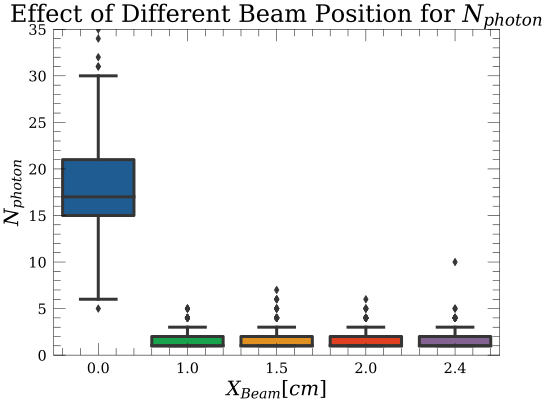

In [50]:
from importlib import reload
import FunctionFor_dE_dx
reload( FunctionFor_dE_dx )
from FunctionFor_dE_dx import GetSiNPE, GetSiPETime
dir_PE = {"NPE":[], "BeamX":[]}
for x, dir_Si in dir_Si_diff_x.items():
    v_PE = GetSiNPE(dir_Si)
    dir_PE["NPE"]+= list(v_PE)
    dir_PE["BeamX"] += [x]*len(v_PE)

import pandas as pd 
import seaborn as sns
df_PE = pd.DataFrame.from_dict(dir_PE)
sns.boxplot(x="BeamX", y="NPE",data=df_PE)
plt.ylim(0, 35)
plt.xlabel("$X_{Beam} [ cm ]$")
plt.ylabel("$N_{photon}$")
plt.title("Effect of Different Beam Position for $N_{photon}$")

# plt.boxplot(list(dir_Si_diff_x.keys()), v2d_PE )
# plt.legend()



0
1.0
1.5
2.0
2.4


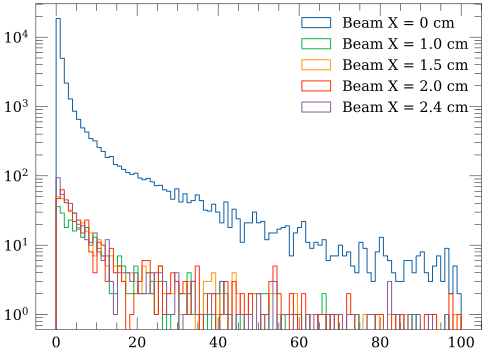

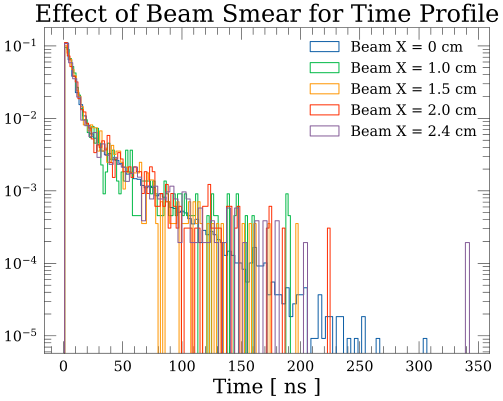

In [51]:
plt.figure("Delta Time")
plt.figure("Time Profile")
for x, dir_Si in dir_Si_diff_x.items():
    v2d_PE_time = GetSiPETime( dir_Si)

    plt.figure("Delta Time")
    print(x)
    v_deltaT = np.concatenate( [np.diff( sorted(v_PE_time)) for v_PE_time in v2d_PE_time] )
    plt.hist( v_deltaT ,bins= np.linspace(0,100, 100),histtype="step", label=f"Beam X = {x} cm")
    plt.legend()
    plt.semilogy()

    plt.figure("Time Profile")
    plt.hist(np.concatenate(v2d_PE_time), bins=100, histtype="step", label=f"Beam X = {x} cm", density=True)
    plt.semilogy()
    plt.legend()
    plt.xlabel("Time [ ns ]")
    plt.title("Effect of Beam Smear for Time Profile")
    # break